# Proyek Akhir Analisis Data# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Fajar Kamaludin Akhmad 
- Email:fajarkamaludin60@gmail.com
- Id Dicoding:fajar_udin

## Menentukan Pertanyaan Bisnis

- Bagaimana musim mempengaruhi pengguna bike sharing?
- Bagaimana performa penyewaan sepeda tiap tahun, bulan, hari, dan jam
- Bagaimana pengaruh cuaca terhadap pengguna bike sharing?
- Faktor lingkungan apa saja yang mempengaruhi pengguna bike sharing?

Menyiapkan library yang dibutuhkan untuk analisis data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

Cek tipe data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Seharusnya tipe data *dteday* berupa *datetime* bukan berupa *object*

Cek missing value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek duplikasi data

In [6]:
day_df.duplicated().sum()

0

Cek parameter statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Memperbaiki tipe data yang kurang tepat

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore

Mengembalikan data asli dari data

In [16]:
day_df['season'] = day_df['season'].apply(lambda x: 'springer' if x == 1 else ('summer' if x == 2 else ('fall' if x == 3 else ('winter' if x == 4 else 'unknown'))))

Menghitung total sepeda yang di rental tiap musim

In [17]:
day_df.groupby(by='season')['cnt'].sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

In [18]:
day_df['yr'] = day_df['yr'].apply(lambda x: '2011' if x == 0 else('2012' if x == 1 else 'unknown'))

Menghitung total sepeda yang di rental tiap tahun

In [19]:
day_df.groupby(by='yr')['cnt'].sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

Mengembalikan data bulan ke dataset

In [20]:
day_df['mnth'] = day_df['mnth'].apply(lambda x: 'Jan' if x == 1 else('Feb' if x == 2 else('Mar' if x == 3 else('Apr' if x == 4 else ('May' if x == 5 else('Jun' if x == 6 else('Jul' if x == 7 else('Aug' if x == 8 else('Sep' if x == 9 else('Oct' if x == 10 else('Nov' if x == 11 else('Dec' if x == 12 else 'Unknown'))))))))))))

Menghitung total sepeda yang di rental tiap bulan

In [21]:
day_df.groupby(by='mnth')['cnt'].sum().sort_values(ascending=False)

mnth
Aug    351194
Jun    346342
Sep    345991
Jul    344948
May    331686
Oct    322352
Apr    269094
Nov    254831
Mar    228920
Dec    211036
Feb    151352
Jan    134933
Name: cnt, dtype: int64

In [22]:
day_df['weekday'] = day_df['weekday'].apply(lambda x: 'sunday' if x == 0 else ('monday' if x == 1 else ('tuesday' if x == 2 else ('wednesday' if x == 3 else('thursday' if x == 4 else ('friday' if x == 5 else ('saturday' if x == 6 else 'unknown')))))))

In [23]:
day_df.groupby(by='weekday')['cnt'].sum().sort_values(ascending=False)

weekday
friday       487790
thursday     485395
saturday     477807
wednesday    473048
tuesday      469109
monday       455503
sunday       444027
Name: cnt, dtype: int64

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

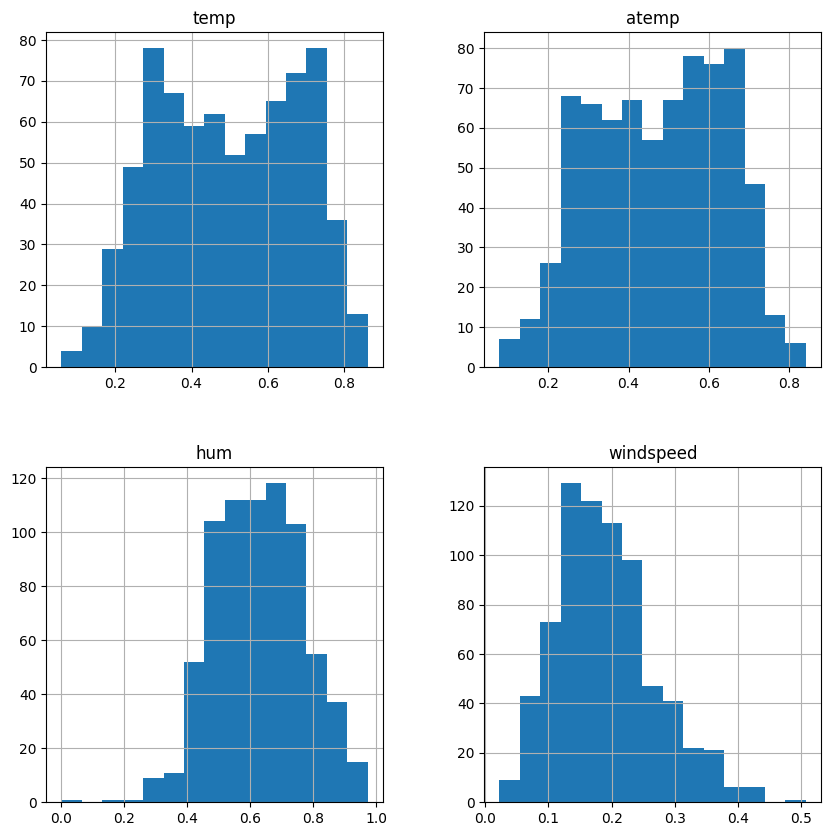

In [24]:
day_num_df = day_df[["temp", "atemp", "hum", "windspeed"]]
day_num_df.hist(bins=15, figsize=(10, 10))

Berdasarkan pengamatan pada tabel day_df, grafik histogram menunjukkan bahwa kolom temp dan kolom atemp memiliki distribusi left-skewed, sementara kolom hum dan kolom windspeed memiliki distribusi right-skewed.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

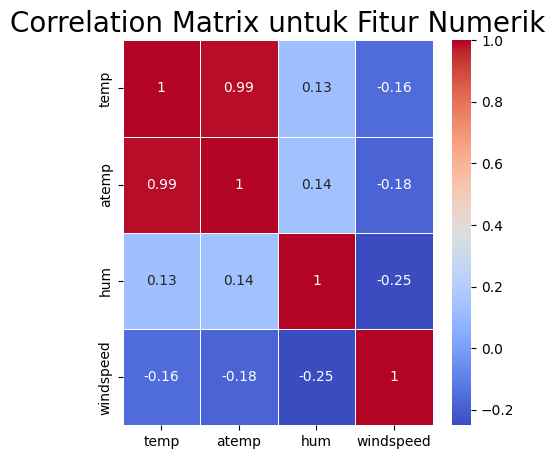

In [25]:
plt.figure(figsize = (5, 5))
correlation_matrix = day_num_df.corr().round(2)
 
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

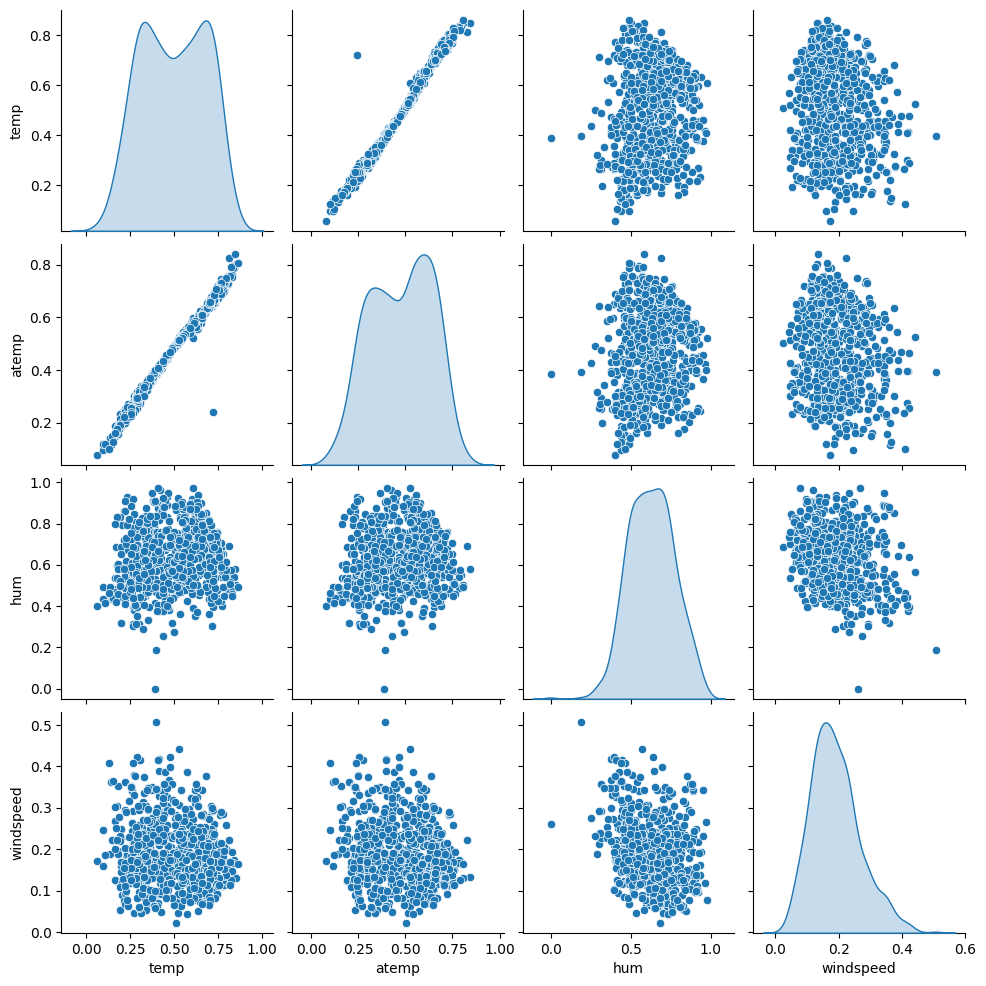

In [26]:
sns.pairplot(data=day_num_df, diag_kind='kde')

Berdasarkan pengamatan pada tabel day_df, dapat dinyatakan bahwa:

Kolom temp dan atemp memiliki korelasi yang sangat kuat.
Kolom temp dan hum hampir tidak memiliki korelasi.
Kolom temp dan windspeed memiliki korelasi yang cukup berlawanan.
Kolom atemp dan hum hampir tidak memiliki korelasi.
Kolom atemp dan windspeed memiliki korelasi yang cukup berlawanan.
Kolom hum dan windspeed memiliki korelasi yang cukup berlawanan.

Membuat kolom baru pada data *hour_df* untuk mengelompokan waktu,
Early morning   = 5-7
Morning         = 8-11
Afternoon       = 12-17
Evening         = 18-20
Night           = 21-23
Late Night      = 0-4

In [27]:
hour_df['hour'] = hour_df['hr'].apply(lambda x: 'Early Morning' if 5 <= x < 8 else ('Morning' if 8 <= x < 12 else ('Afternoon' if 12 <= x < 18 else ('Evening' if 18 <= x < 21 else ('Night' if 21 <= x < 24 else ('Late Night' if 0 <= x < 5 else 'Unknown') )))))

Menghitung total sepeda yang di rental tiap jam

In [28]:
hour_df.groupby(by='hour')['cnt'].sum().sort_values(ascending=False)

hour
Afternoon        1292742
Evening           701111
Morning           698016
Night             284998
Early Morning     223564
Late Night         92248
Name: cnt, dtype: int64

In [29]:
hour_df['weathersit'] = hour_df['weathersit'].apply(lambda x: 'Clear' if x == 1 else('Mist + Cloudy' if x == 2 else('Light Snow' if x == 3 else('Heavy Rain' if x == 4 else 'Unknown')))) 

In [30]:
hour_df.groupby(by='weathersit')['cnt'].sum().sort_values(ascending=False)

weathersit
Clear            2338173
Mist + Cloudy     795952
Light Snow        158331
Heavy Rain           223
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana musim mempengaruhi pengguna bike sharing?

In [31]:
byseason_df = day_df.groupby(by='season')['cnt'].sum().sort_values(ascending=False).reset_index()
byseason_df.head()

,season,cnt
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

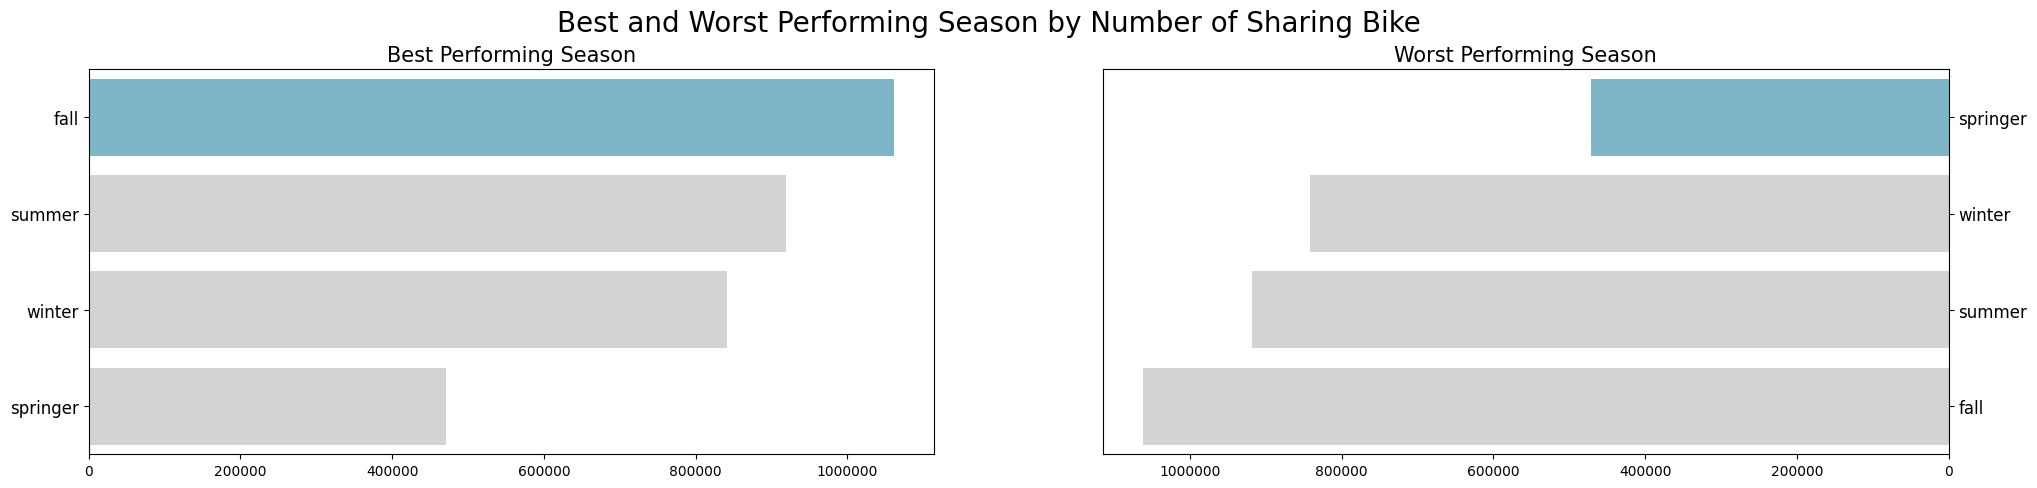

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 5))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="cnt", y="season", data=byseason_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Season", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].get_xaxis().get_major_formatter().set_scientific(False)
 
sns.barplot(x="cnt", y="season", data=byseason_df.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Season", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].get_xaxis().get_major_formatter().set_scientific(False)
 
plt.suptitle("Best and Worst Performing Season by Number of Sharing Bike\n\n", fontsize=20, y=1)
plt.show()

### Bagaimana performa penyewaan sepeda tiap tahun, bulan, hari, dan jam

In [33]:
byyear_df = day_df.groupby(by='yr')['cnt'].sum().sort_values(ascending=False).reset_index()
byyear_df.head()

,yr,cnt
0,2012,2049576
1,2011,1243103


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


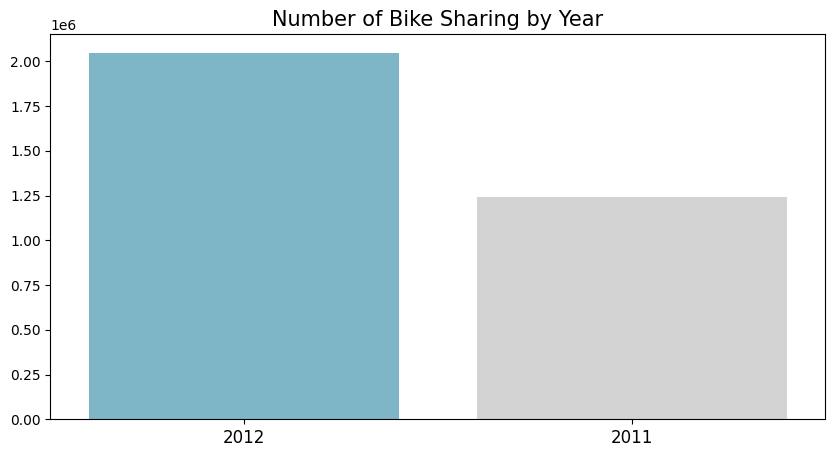

In [34]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="cnt",
    x="yr",
    palette=colors,
    data=byyear_df.sort_values(by="yr", ascending=False),
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [35]:
bymonth_df = day_df.groupby(by='mnth')['cnt'].sum().sort_values(ascending=False).reset_index()
bymonth_df

,mnth,cnt
0,Aug,351194
1,Jun,346342
2,Sep,345991
3,Jul,344948
4,May,331686
5,Oct,322352
6,Apr,269094
7,Nov,254831
8,Mar,228920
9,Dec,211036


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


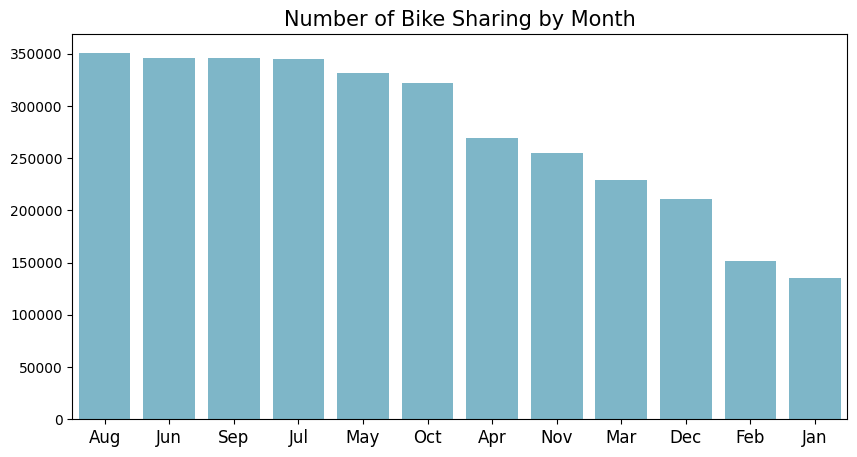

In [36]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt",
    x="mnth",
    palette=colors,
    data=bymonth_df,
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [37]:
byday_df = day_df.groupby(by='weekday')['cnt'].sum().sort_values(ascending=False).reset_index()
byday_df

,weekday,cnt
0,friday,487790
1,thursday,485395
2,saturday,477807
3,wednesday,473048
4,tuesday,469109
5,monday,455503
6,sunday,444027


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


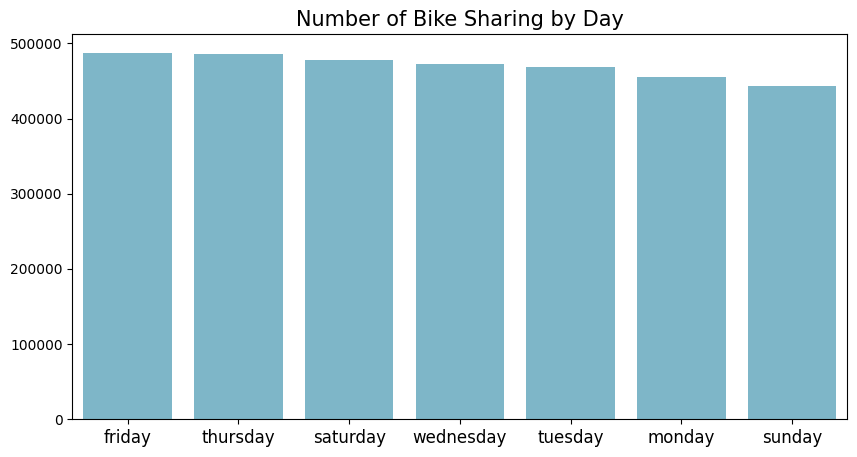

In [38]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt",
    x="weekday",
    palette=colors,
    data=byday_df,
)
plt.title("Number of Bike Sharing by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [39]:
bytime_df = hour_df.groupby(by='hour')['cnt'].sum().sort_values(ascending=False).reset_index()
bytime_df

,hour,cnt
0,Afternoon,1292742
1,Evening,701111
2,Morning,698016
3,Night,284998
4,Early Morning,223564
5,Late Night,92248


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


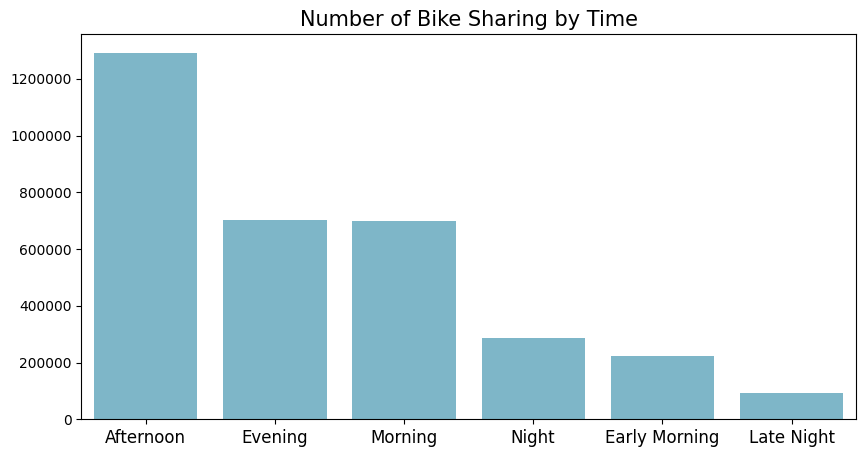

In [40]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt",
    x="hour",
    palette=colors,
    data=bytime_df,
)
plt.title("Number of Bike Sharing by Time", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

In [53]:
bysit_df = hour_df.groupby(by='weathersit')['cnt'].sum().sort_values(ascending=False).reset_index()
bysit_df

,weathersit,cnt
0,Clear,2338173
1,Mist + Cloudy,795952
2,Light Snow,158331
3,Heavy Rain,223


c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\fajar\anaconda3\envs\analisis_data\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


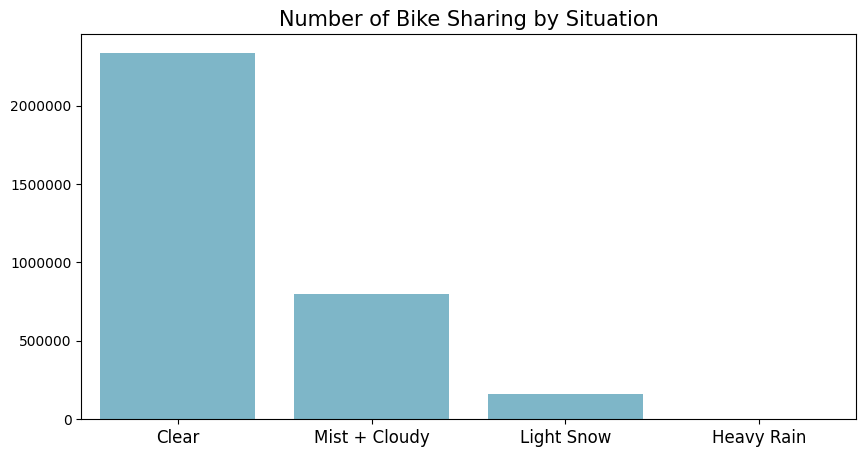

In [42]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt",
    x="weathersit",
    palette=colors,
    data=bysit_df,
)
plt.title("Number of Bike Sharing by Situation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

- Faktor lingkungan apa saja yang mempengaruhi pengguna bike sharing?

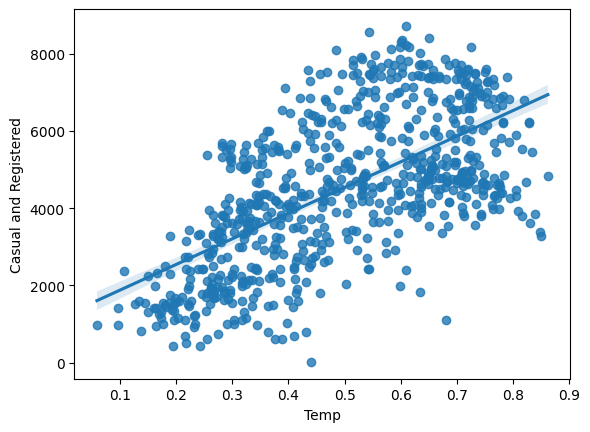

In [43]:
sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.xlabel("Temp")
plt.ylabel("Casual and Registered")
plt.show()

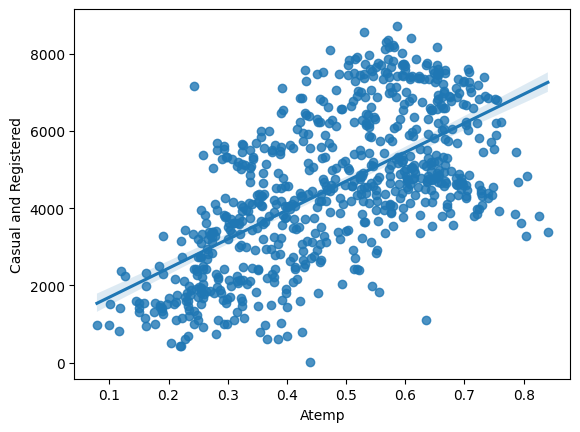

In [44]:
sns.regplot(x=day_df["atemp"], y=day_df["cnt"])
plt.xlabel("Atemp")
plt.ylabel("Casual and Registered")
plt.show()

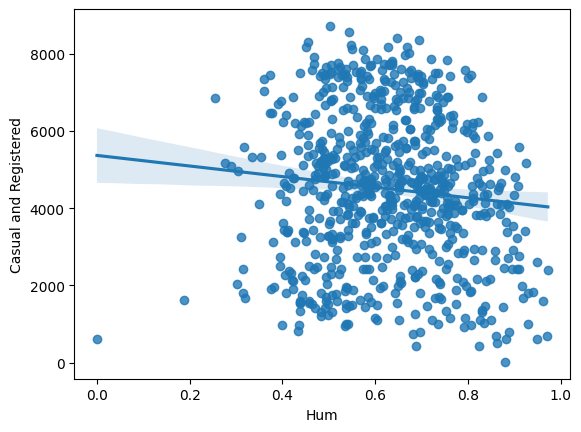

In [45]:
sns.regplot(x=day_df["hum"], y=day_df["cnt"])
plt.xlabel("Hum")
plt.ylabel("Casual and Registered")
plt.show()

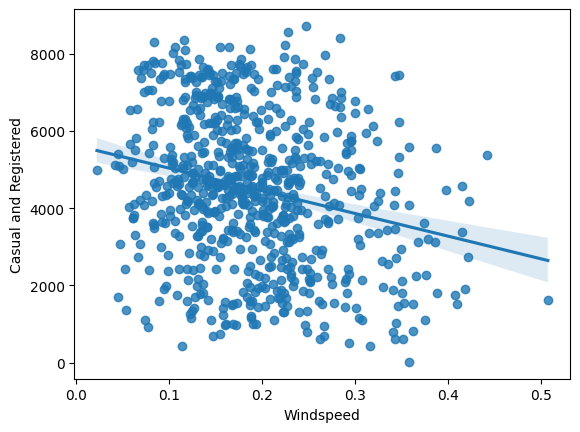

In [46]:
sns.regplot(x=day_df["windspeed"], y=day_df["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Casual and Registered")
plt.show()

Text(0.5, 0, 'Hum')

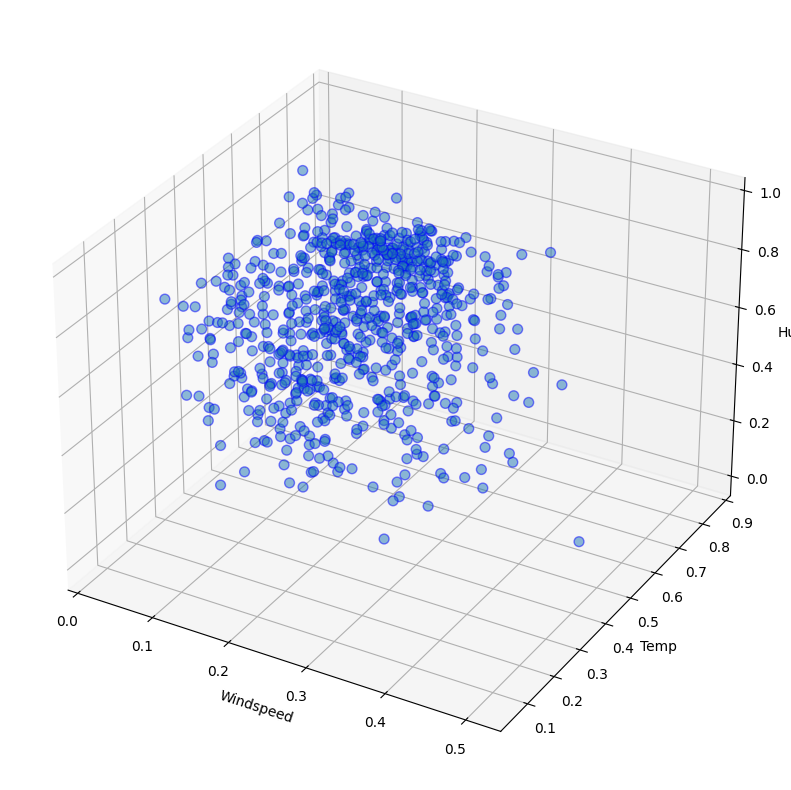

In [47]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ys = day_df['temp']
zs = day_df['hum']
xs = day_df['windspeed']
ax.scatter(xs, ys, zs, s=50, alpha=0.5, edgecolors='b')

ax.set_xlabel('Windspeed')
ax.set_ylabel('Temp')
ax.set_zlabel('Hum')

## Conslusion

- Berdasarkan hasil pengamatan pada tabel byseason_df, terlihat bahwa banyak pengguna bike sharing pada musim fall. sehingga dapat disimpulkan bahwa musim gugur memiliki dampak positif terhadap pengguna bike sharing
- Berdasarkan pengamatan pada tabel byyear_df, terlihat bahwa banyak pengguna bike sharing pada tahun 2012. Dapat disimpulkan bahwa tren paling banyak pada tahun 2012
- Berdasarkan pengamatan pada tabel bymont_df, terlihat bahwa paling banyak pengguna bike sharing pada bulan Agustus. Dapat disimpulkan bahwa tren paling banyak pada bulan Agustus.
- Berdasarkan pengamatan pada tabel byday_df, terlihat bahwa paling banyak pengguna bike sharing pada hari Jumat. Dapat disimpulkan bahwa tren paling banyak pada hari jumat.
- Kemudian dari pengamatan pada data hour_df, terlihat bahwa jam paling banyak pengguna bike sharing yaitu pada siang-sore hari atau dari jam 12-17
- Berdasarkan pengamatan pada tabel bysit_df, terlihat bahwa pengguna paling banyak pada situasi atau cuaca yang cerah, dan paling sedikit ketika hujan. Dari sini dapat disimpulkan bahwa kondisi cuaca berpengaruh terhadap pengguna bike sharing
- Berdasarkan hasil pengamatan pada tabel day_df pada kolom temp dan cnt memiliki hubungan yang positif, pada kolom atemp dan cnt memiliki hubungan yang positif, pada kolom hum dan cnt berpengaruh jika kelembapannya diantara 40-85%, pada kolom windspeed dan cnt berpengaruh jika kecepatan anginnya diantara 3-20 knot. Dapat disimpulkan bahwa faktor lingkungan yang berpengaruh terhadap pengguna bike sharing adalah temp, atemp, hum dengan range 40-85% dan windspeed dengan range 3-20 knot.

## Export Dataset

In [49]:
day_df.to_csv("dashboard\day_clean.csv", index=False)